<a href="https://colab.research.google.com/github/mmbs1989/DSWP-Aluno/blob/main/TCCfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [27]:
df = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostccdata.csv")
dfa = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostcca.csv")
df = df.drop(df.index[314:])
dfa = dfa.drop(dfa.index[314:])
df['a'] = dfa['a']
df['a'] = pd.to_numeric(df['a'])
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)


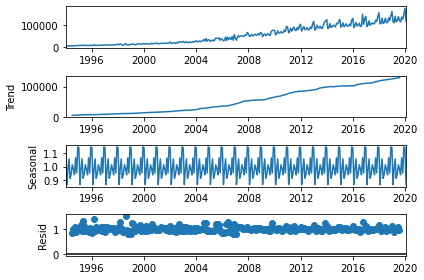

In [31]:
result = seasonal_decompose(df, model='multiplicative')
fig = result.plot()

In [ ]:
df.tail(30)

,y
ds,
2017-09-01,105595
2017-10-01,121144
2017-11-01,115089
2017-12-01,137842
2018-01-01,155619
2018-02-01,105122
2018-03-01,105659
2018-04-01,130806
2018-05-01,106192


In [ ]:
df.dtypes

y    int64
dtype: object

In [ ]:
print(df.shape)

(316, 1)


In [ ]:
df.describe()

,y
count,316.000000
mean,54334.367089
std,42312.262617
min,4343.000000
25%,15019.500000
50%,45845.000000
75%,91577.000000
max,174991.000000


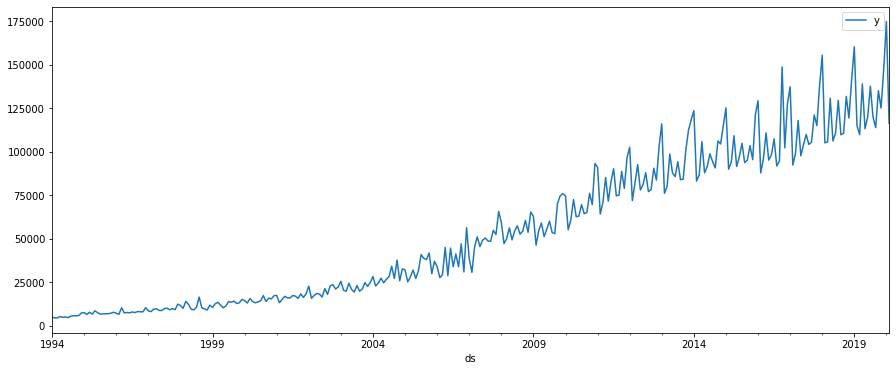

In [ ]:
df.plot(figsize=(15,6))

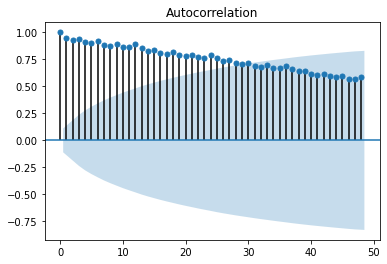

In [ ]:
plot_acf(df, lags=48)
plt.show()

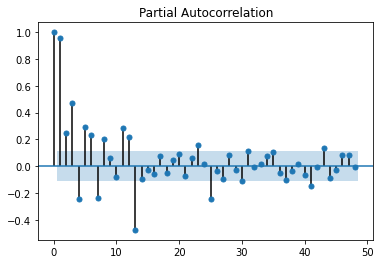

In [ ]:
plot_pacf(df, lags=48)
plt.show()

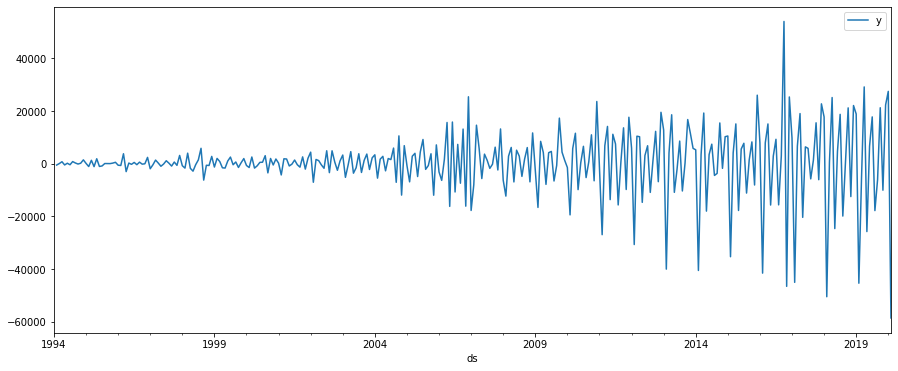

In [ ]:
df.diff().plot(figsize=(15,6))

In [ ]:
arima = ARIMA(df, freq='MS', order=(5,1,2)).fit()
(arima.resid ** 2).mean()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


53729356.563970715

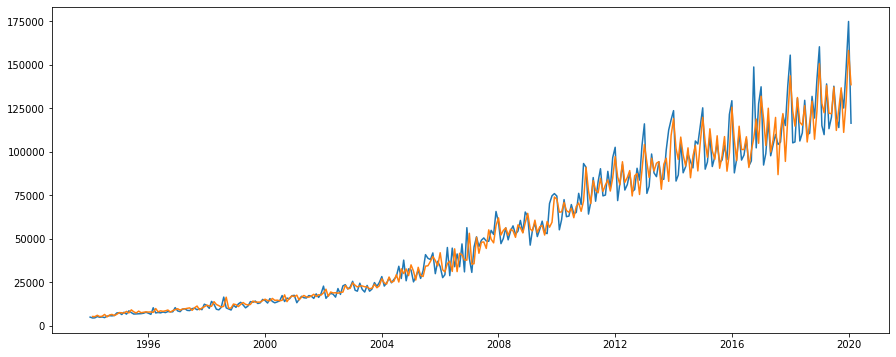

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df)
plt.plot(arima.predict(typ='levels'))

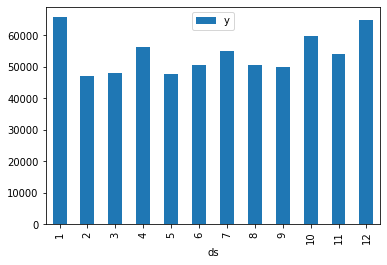

In [ ]:
df.groupby(df.index.month).mean().plot(kind='bar')